<a href="https://colab.research.google.com/github/Ahmed22f22616/MLS/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

In [ ]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Machine Learning Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")


In [ ]:
import pandas as pd

In [ ]:
# Load the dataset (replace with actual file name if different)
df = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
# Show shape and first few rows
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Also check for blank strings which may be "missing" but not null
print("\nBlank strings per column:")
print((df == ' ').sum())


Blank strings per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Convert 'TotalCharges' to numeric if needed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
# Select numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

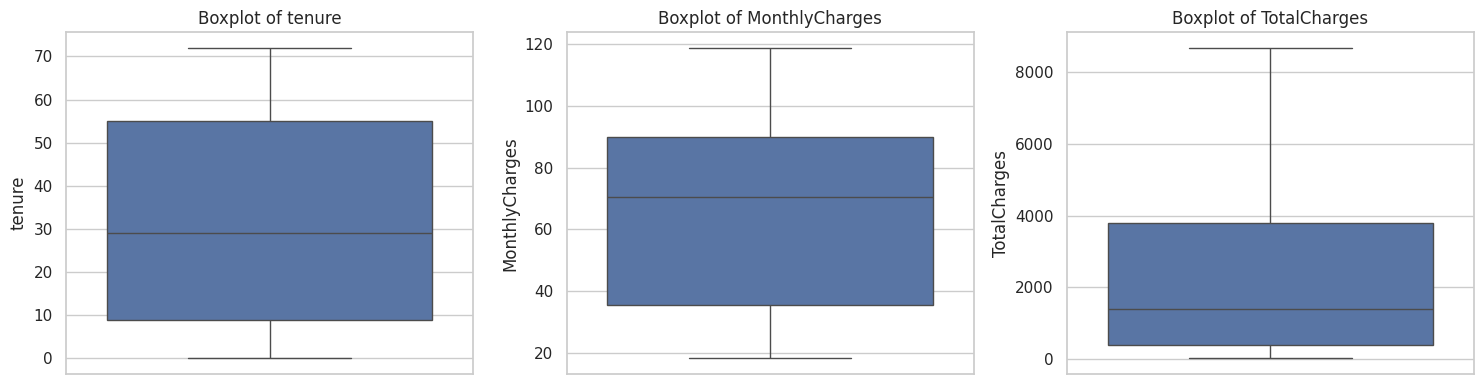

In [ ]:
# Create boxplots
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
# Check number of missing values before dropping
print("Missing values before dropping:", df.isnull().sum().sum())

Missing values before dropping: 11


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Check shape after dropping
print("New dataset shape after dropping missing values:", df.shape)

New dataset shape after dropping missing values: (7032, 20)


In [ ]:
# Dataset structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
# Statistical summary of numerical features
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [ ]:
# Distribution of target variable
print("\nChurn value counts:")
print(df['Churn'].value_counts())


Churn value counts:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


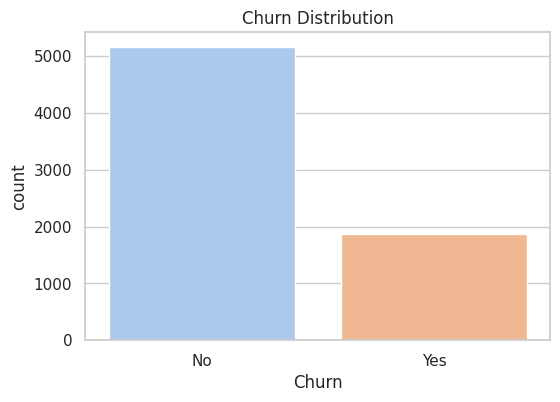

In [ ]:
# Bar plot of churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.show()

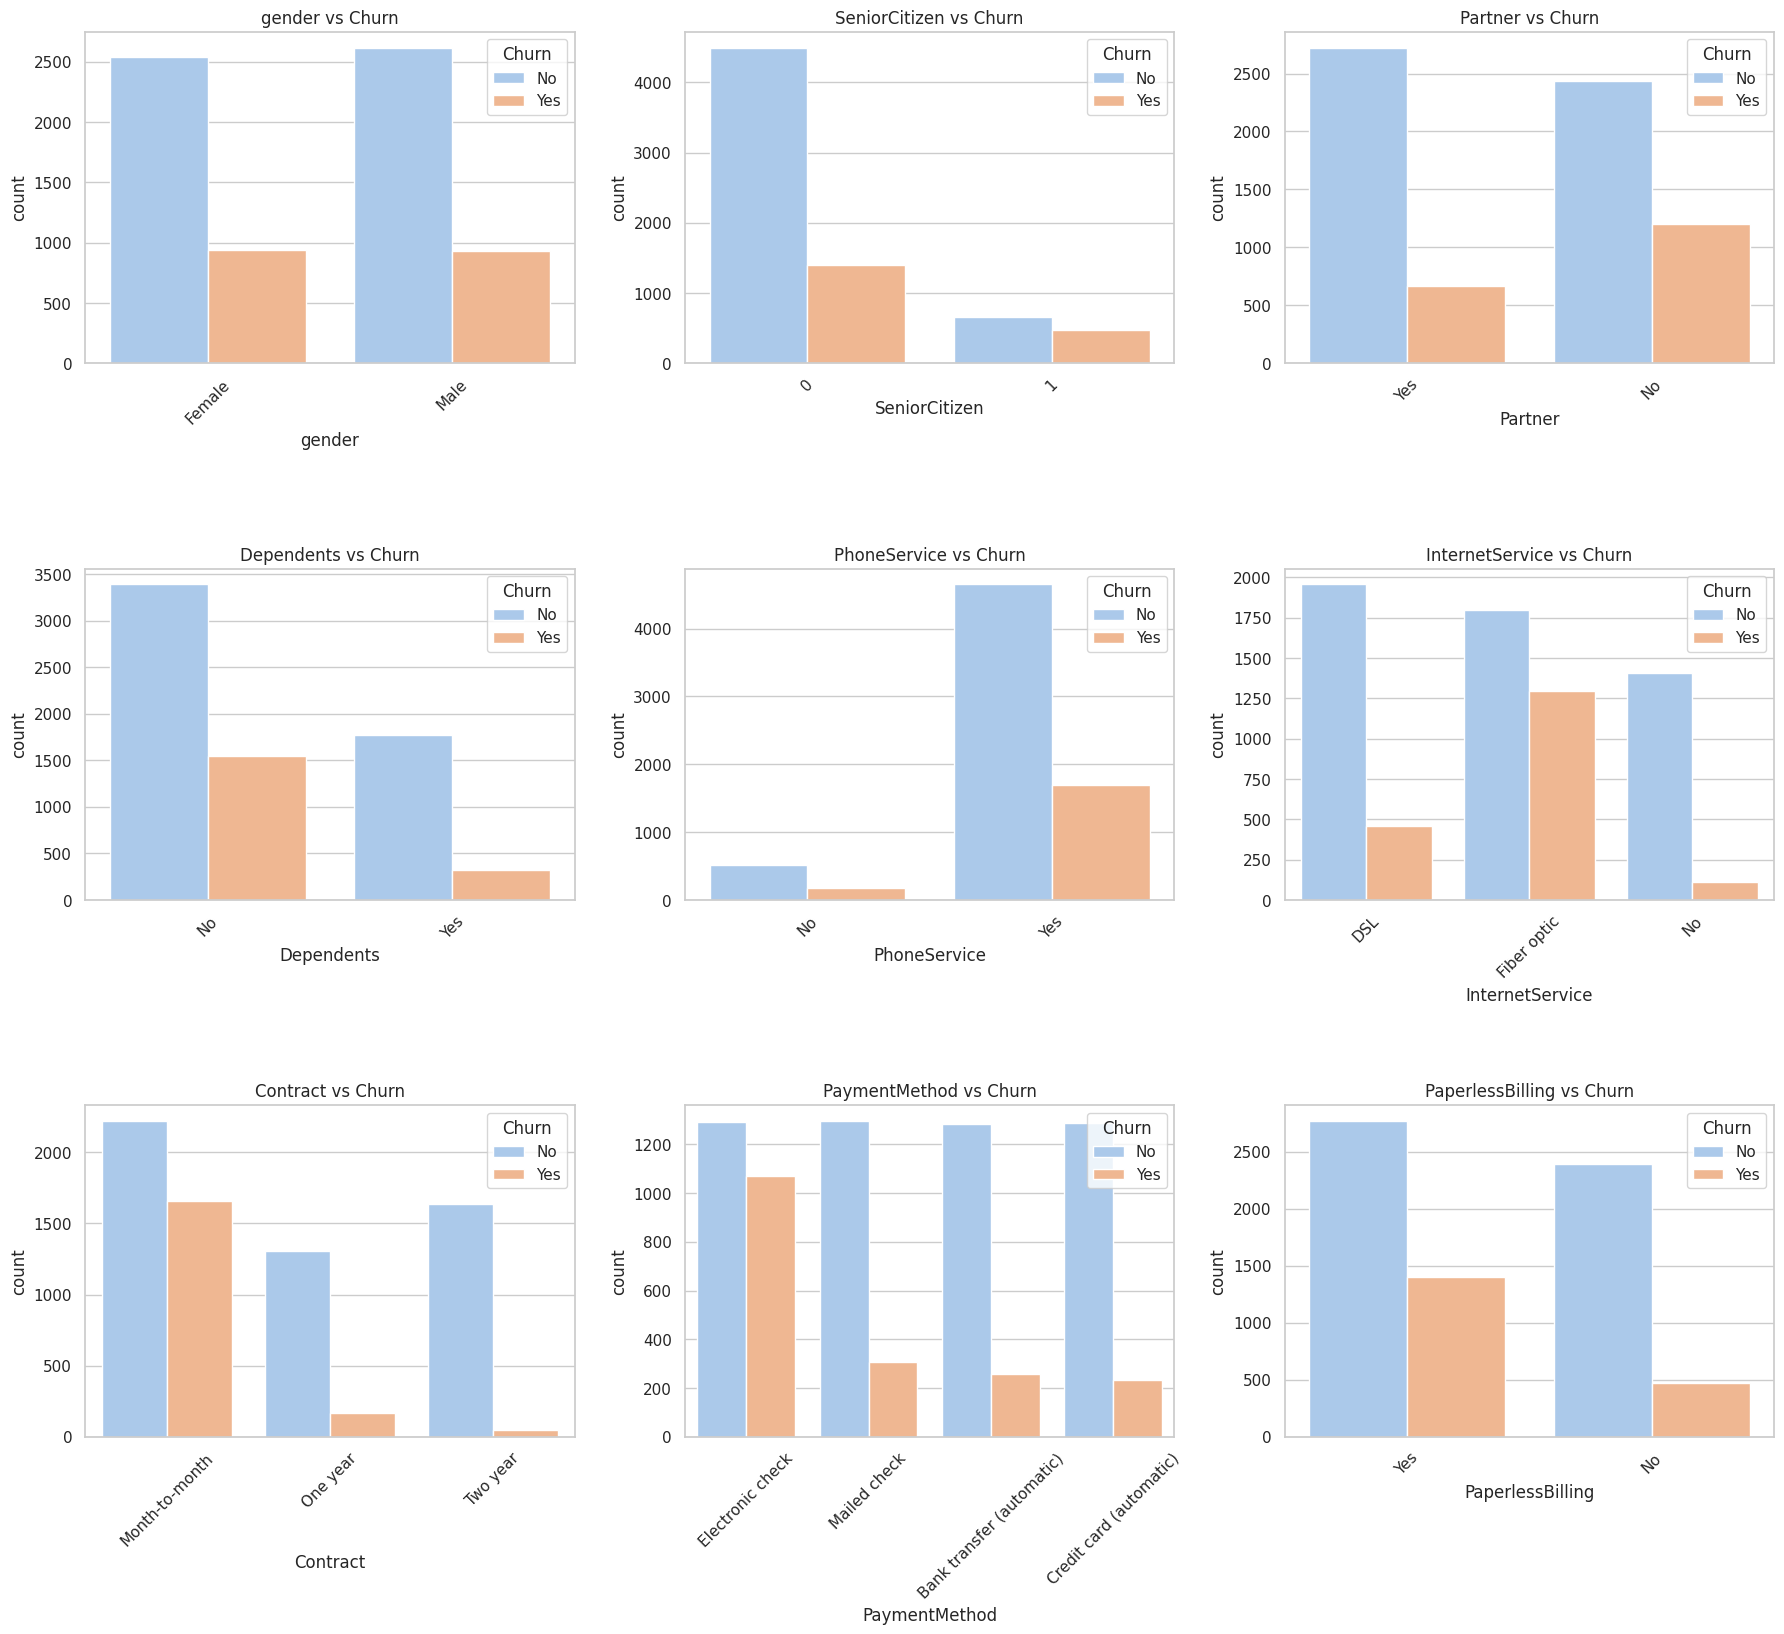

In [ ]:
# Plot countplots for each categorical feature vs Churn
plt.figure(figsize=(18, 20))
for i, col in enumerate(cat_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# List of numeric features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

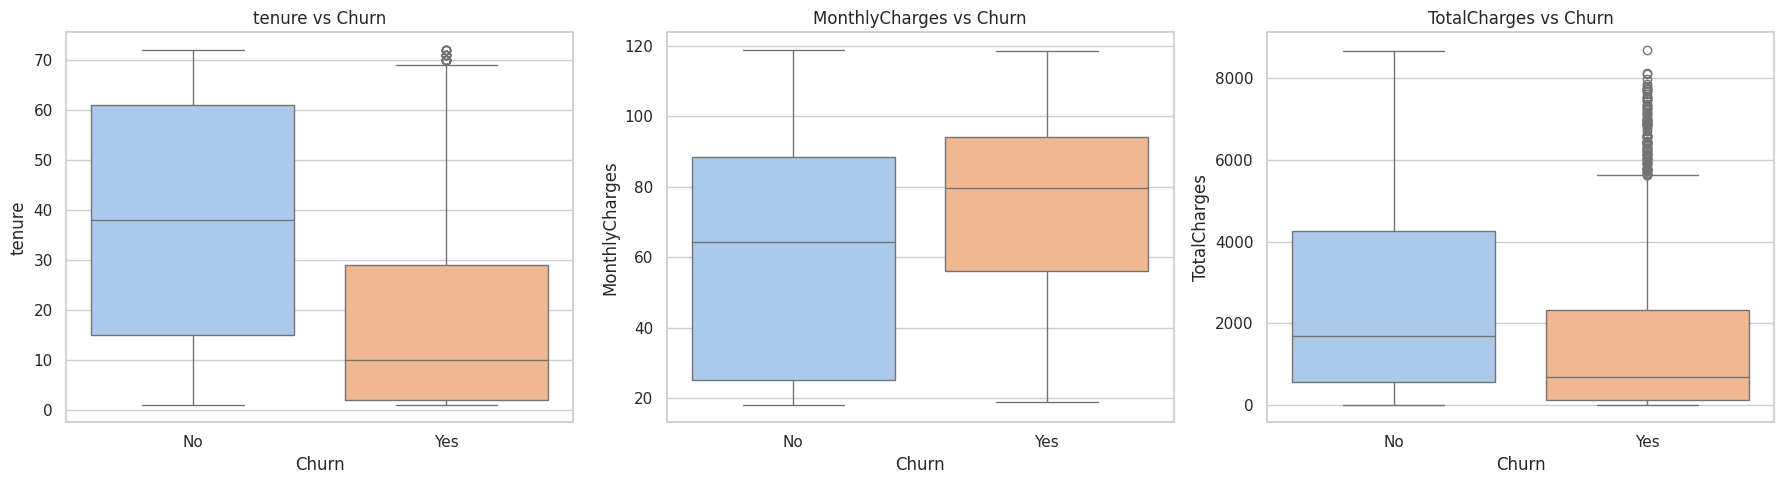

In [ ]:
# Boxplots comparing numeric features by Churn
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()


In [ ]:
# Compute correlation matrix
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

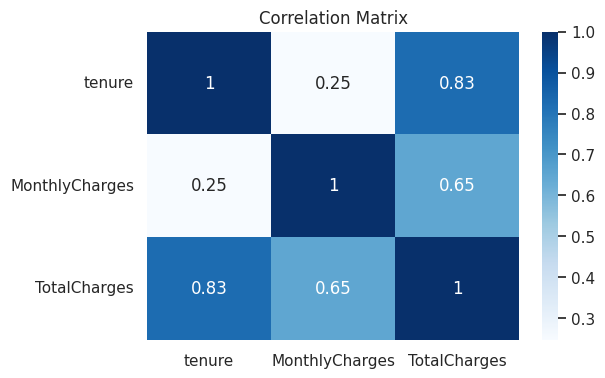

In [ ]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:

print("Categorical columns to encode:", cat_cols)

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize label encoder
le = LabelEncoder()

In [ ]:
# Apply to all categorical columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
print("Encoding complete.")

Encoding complete.


In [ ]:
# Compute correlation matrix
corr = df.corr()

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Axes: >

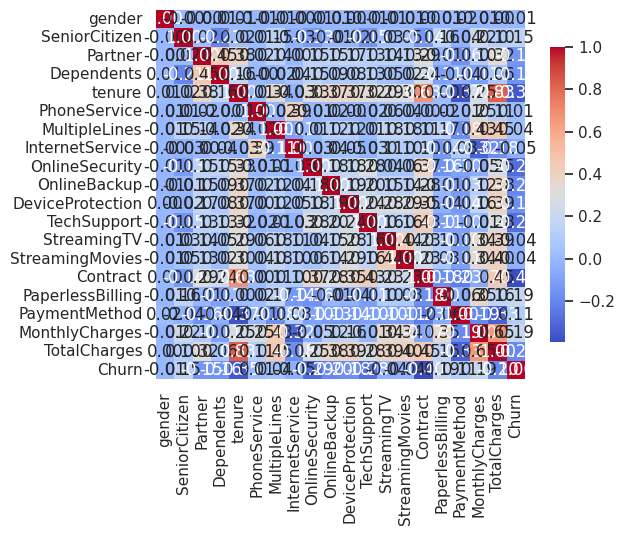

In [ ]:
# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})

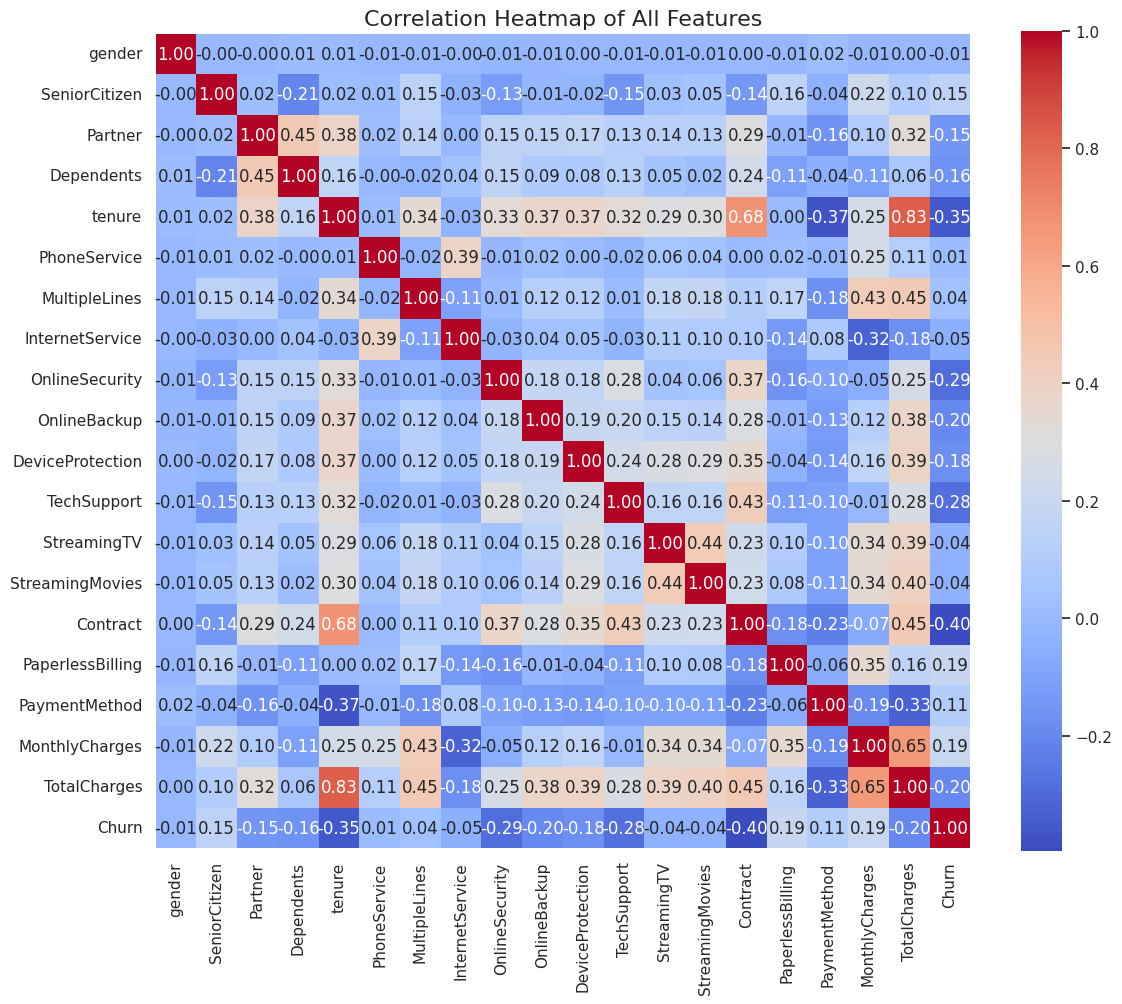

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df
corr = df.corr()  # Compute the correlation matrix

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
# Compute correlation with the target variable
correlation_with_target = df.corr()['Churn'].drop('Churn')

In [ ]:

# Filter features with correlation > 0.15 or < -0.15
selected_features = correlation_with_target[correlation_with_target.abs() > 0.19].index.tolist()

In [ ]:
# Show selected features
print("Selected features based on correlation threshold (|r| > 0.19):")
print(selected_features)


Selected features based on correlation threshold (|r| > 0.19):
['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# Define new feature set
X = df[selected_features]
y = df['Churn']

In [ ]:
# Split the filtered features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Scale for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict
dt_preds = dt_model.predict(X_test)

In [ ]:
# Evaluate
print("----- Decision Tree Evaluation (Filtered Features) -----")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("F1 Score:", f1_score(y_test, dt_preds))
print("\nClassification Report:\n", classification_report(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

----- Decision Tree Evaluation (Filtered Features) -----
Accuracy: 0.7270788912579957
F1 Score: 0.49473684210526314

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407

Confusion Matrix:
 [[835 198]
 [186 188]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [81]:
# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [82]:
# Predict
knn_preds = knn_model.predict(X_test_scaled)

In [83]:
# Evaluate
print("----- KNN Evaluation (Filtered Features) -----")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("F1 Score:", f1_score(y_test, knn_preds))
print("\nClassification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

----- KNN Evaluation (Filtered Features) -----
Accuracy: 0.7683013503909026
F1 Score: 0.5302593659942363

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Confusion Matrix:
 [[897 136]
 [190 184]]


In [84]:
from sklearn.metrics import roc_curve, auc

In [85]:
# For KNN
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)


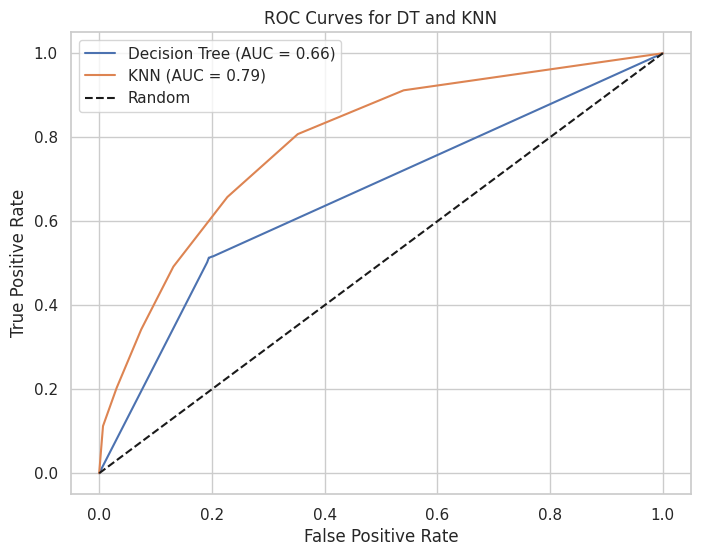

In [86]:
from sklearn.metrics import roc_curve, auc

# Decision Tree ROC
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# KNN ROC
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for DT and KNN')
plt.legend()
plt.grid(True)
plt.show()


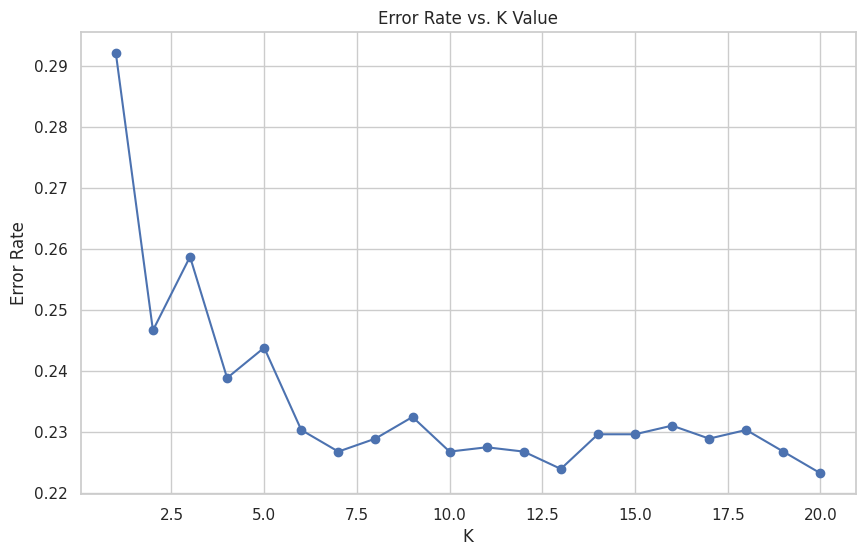

In [87]:
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rates, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
